In [36]:
# Import required libraries
import sys
import numpy as np
import pandas as pd 
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
print("System/Python Information", sys.version)
print("Numpy Version", np.__version__)
print("Pandas Version", pd.__version__) 
print("Matplotlib Version",  mt.__version__)
print("Seabon Version", sns.__version__)

System/Python Information 3.9.6 (default, Feb  3 2024, 15:58:27) 
[Clang 15.0.0 (clang-1500.3.9.4)]
Numpy Version 1.26.4
Pandas Version 2.2.2
Matplotlib Version 3.8.4
Seabon Version 0.13.2


In [38]:
# Load the dataset
netflix_data = pd.read_csv('./data/netflix.csv')

In [39]:
# Get Basic Information about the DataFrame
netflix_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [40]:
# Checking the shape of the dataset
dataset_shape = netflix_data.shape

# Checking data types of the attributes
dataset_dtypes = netflix_data.dtypes

dataset_shape, dataset_dtypes

((8807, 12),
 show_id         object
 type            object
 title           object
 director        object
 cast            object
 country         object
 date_added      object
 release_year     int64
 rating          object
 duration        object
 listed_in       object
 description     object
 dtype: object)

In [41]:
# Displaying basic metrics using the describe() method for numerical columns
basic_metrics_numerical = netflix_data.describe()

# Displaying basic metrics for categorical columns like 'Type', 'Country', and 'Rating'
basic_metrics_categorical = netflix_data[['type', 'country', 'rating']].describe(include=['object'])

basic_metrics_numerical, basic_metrics_categorical

(       release_year
 count   8807.000000
 mean    2014.180198
 std        8.819312
 min     1925.000000
 25%     2013.000000
 50%     2017.000000
 75%     2019.000000
 max     2021.000000,
          type        country rating
 count    8807           7976   8803
 unique      2            748     17
 top     Movie  United States  TV-MA
 freq     6131           2818   3207)

In [42]:
# Convert categorical attributes to 'category' data type if required
categorical_columns = ['type', 'country', 'rating']
netflix_data[categorical_columns] = netflix_data[categorical_columns].astype('category')

# After conversion data types
after_conversion_data_types = netflix_data.dtypes
# Missing value detection
missing_values = netflix_data.isnull().sum()

In [43]:
# Non-Graphical Analysis: Value counts for key attributes
value_counts_type = netflix_data['type'].value_counts()
value_counts_country = netflix_data['country'].value_counts().head(10)  # Top 10 countries
value_counts_rating = netflix_data['rating'].value_counts()
value_counts_release_year = netflix_data['release_year'].value_counts().head(10)  # Top 10 release years

# Unique attributes for key columns
unique_type = netflix_data['type'].unique()
unique_country = netflix_data['country'].unique()
unique_rating = netflix_data['rating'].unique()
unique_release_year = netflix_data['release_year'].unique()

value_counts_type, value_counts_country, value_counts_rating, value_counts_release_year, unique_type, unique_country, unique_rating, unique_release_year

(type
 Movie      6131
 TV Show    2676
 Name: count, dtype: int64,
 country
 United States     2818
 India              972
 United Kingdom     419
 Japan              245
 South Korea        199
 Canada             181
 Spain              145
 France             124
 Mexico             110
 Egypt              106
 Name: count, dtype: int64,
 rating
 TV-MA       3207
 TV-14       2160
 TV-PG        863
 R            799
 PG-13        490
 TV-Y7        334
 TV-Y         307
 PG           287
 TV-G         220
 NR            80
 G             41
 TV-Y7-FV       6
 UR             3
 NC-17          3
 74 min         1
 84 min         1
 66 min         1
 Name: count, dtype: int64,
 release_year
 2018    1147
 2017    1032
 2019    1030
 2020     953
 2016     902
 2021     592
 2015     560
 2014     352
 2013     288
 2012     237
 Name: count, dtype: int64,
 ['Movie', 'TV Show']
 Categories (2, object): ['Movie', 'TV Show'],
 ['United States', 'South Africa', NaN, 'India', 'United State

In [44]:
# Checking for missing values
missing_values = netflix_data.isnull().sum()
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

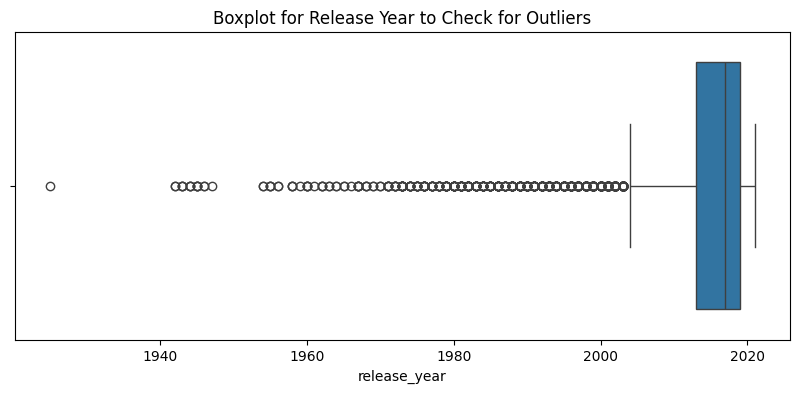

In [45]:
# Boxplot to check for outliers in 'release_year'
plt.figure(figsize=(10, 4))
sns.boxplot(x=netflix_data['release_year'])
plt.title('Boxplot for Release Year to Check for Outliers')
plt.show()

In [46]:
# Unnesting the data in columns like Actor, Director, Country
# Splitting the comma-separated values and unnesting
unnested_director = netflix_data.assign(director=netflix_data['director'].str.split(', ')).explode('director')
unnested_cast = netflix_data.assign(cast=netflix_data['cast'].str.split(', ')).explode('cast')
unnested_country = netflix_data.assign(country=netflix_data['country'].str.split(', ')).explode('country')

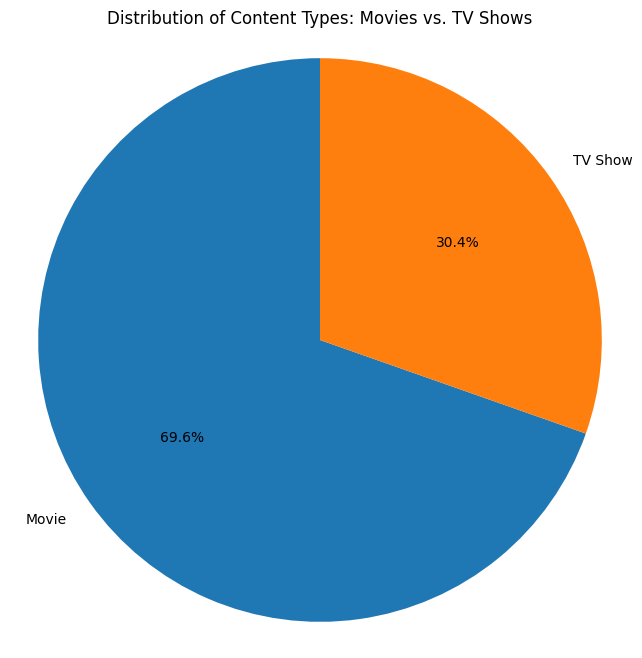

In [47]:
# Univariate Example with Pie Chart for 'Type' (Movie/TV Show)
type_counts = netflix_data['type'].value_counts()
labels = type_counts.index
sizes = type_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Content Types: Movies vs. TV Shows')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/var/folders/rs/m2tykgts4c58vy1x3bg5v2640000gn/T/ipykernel_8815/3288897527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='Set3')


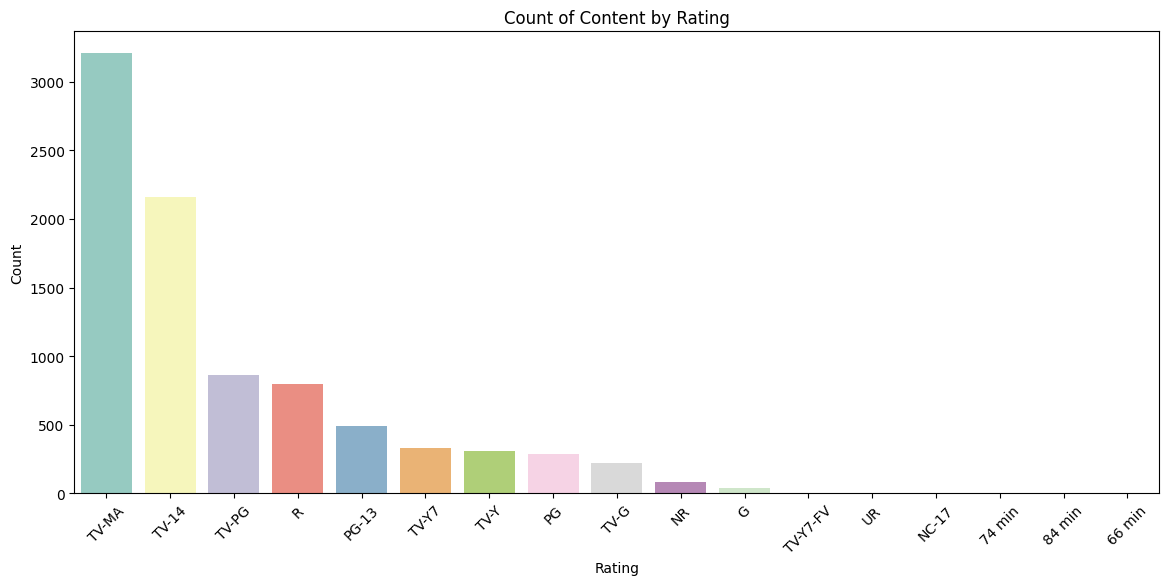

In [48]:
# Countplot for Rating
plt.figure(figsize=(14, 6))
sns.countplot(x='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='Set3')
plt.title('Count of Content by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/rs/m2tykgts4c58vy1x3bg5v2640000gn/T/ipykernel_8815/2503192123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.index, x=top_directors.values, palette='viridis')


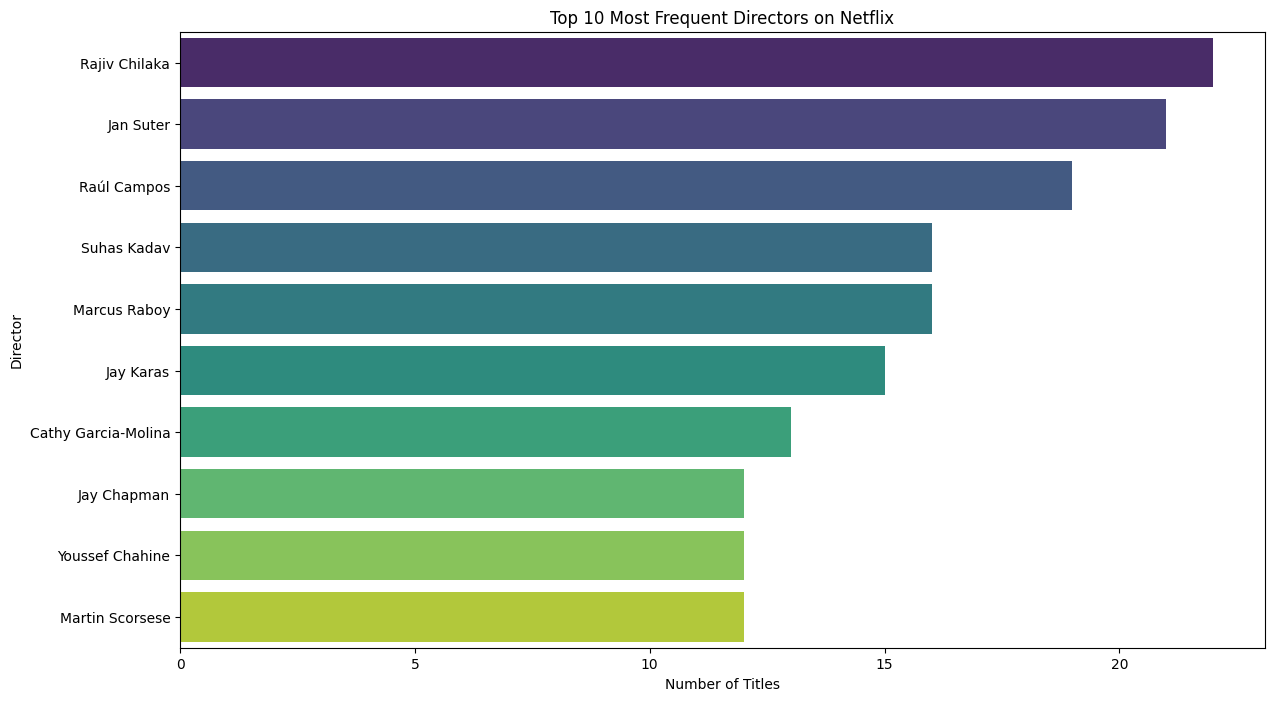

In [49]:
top_directors = unnested_director['director'].value_counts().head(10)

# Visualizing the top 10 directors with a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(y=top_directors.index, x=top_directors.values, palette='viridis')
plt.title('Top 10 Most Frequent Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

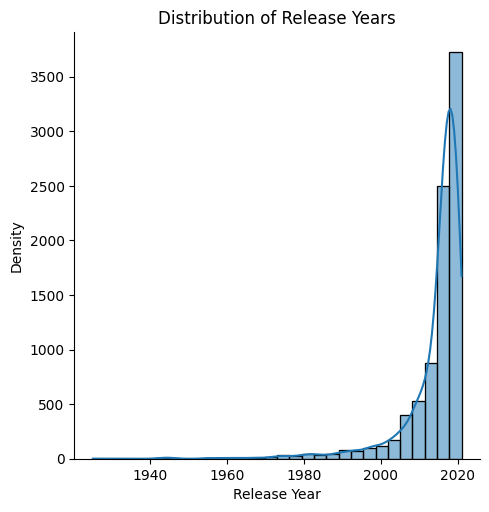

In [50]:
# Distplot for release_year
sns.displot(netflix_data['release_year'], kde=True, bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.show()

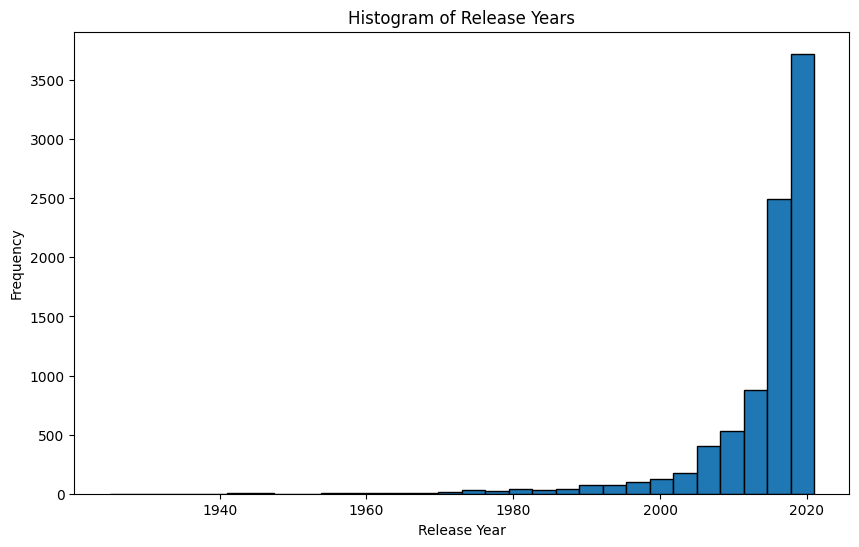

In [51]:
# Histogram for release_year
plt.figure(figsize=(10, 6))
plt.hist(netflix_data['release_year'], bins=30, edgecolor='black')
plt.title('Histogram of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

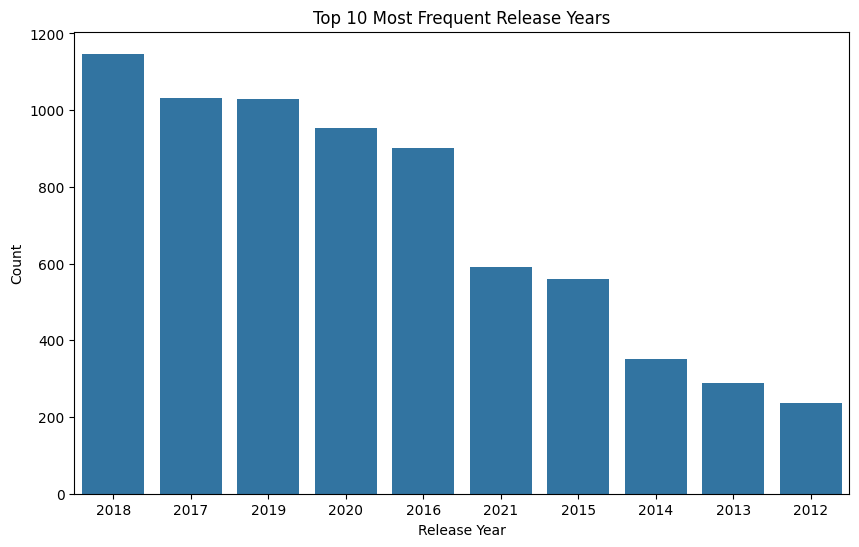

In [52]:
# Countplot for top 10 release years
plt.figure(figsize=(10, 6))
sns.countplot(data=netflix_data, x='release_year', order=netflix_data['release_year'].value_counts().iloc[:10].index)
plt.title('Top 10 Most Frequent Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

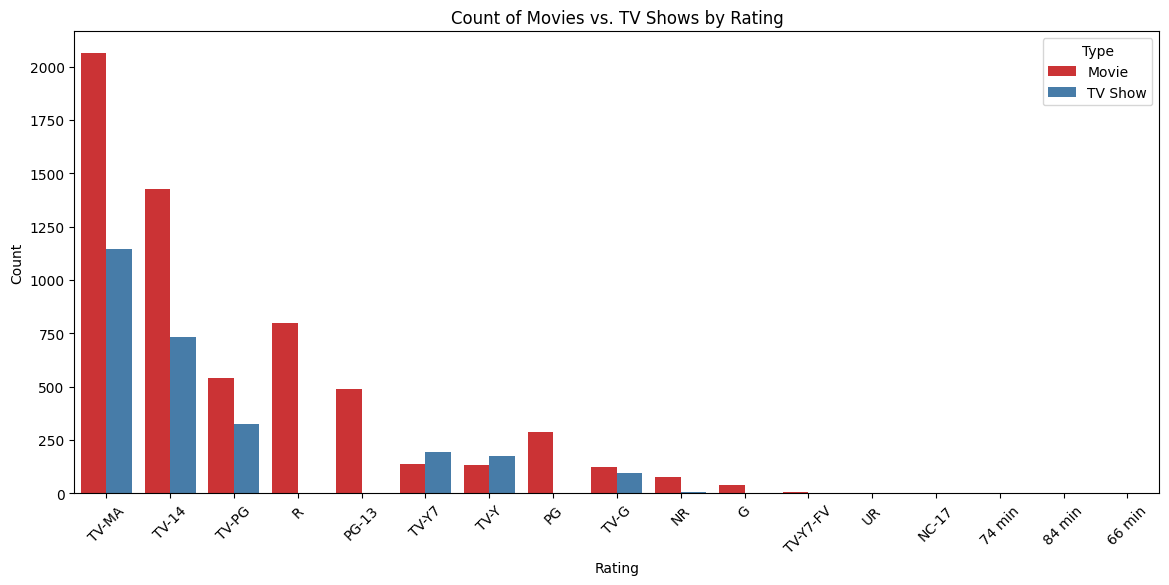

In [53]:
# Countplot for Type vs Rating
plt.figure(figsize=(14, 6))
sns.countplot(x='rating', hue='type', data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='Set1')
plt.title('Count of Movies vs. TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

/var/folders/rs/m2tykgts4c58vy1x3bg5v2640000gn/T/ipykernel_8815/3501463087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='release_year', data=netflix_data, palette='Set1')


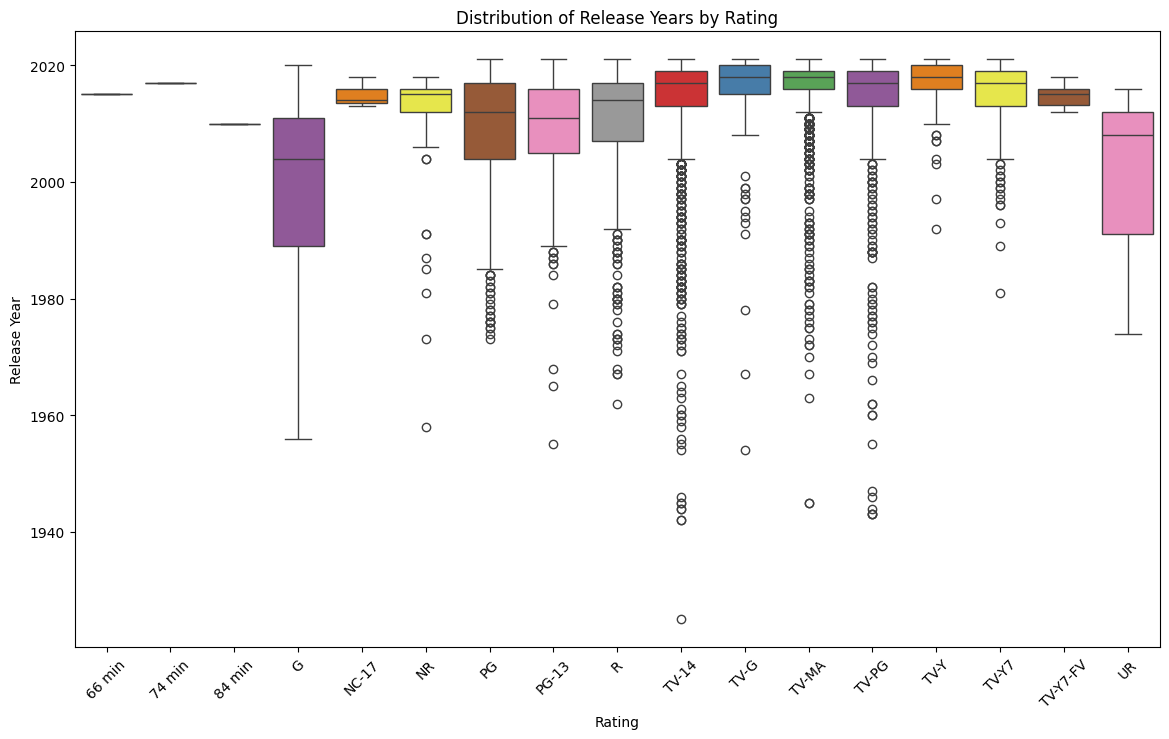

In [54]:
# Boxplot for rating vs. release_year
plt.figure(figsize=(14, 8))
sns.boxplot(x='rating', y='release_year', data=netflix_data, palette='Set1')
plt.title('Distribution of Release Years by Rating')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.xticks(rotation=45)
plt.show()

/var/folders/rs/m2tykgts4c58vy1x3bg5v2640000gn/T/ipykernel_8815/2307262687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='release_year', data=netflix_data, palette='Set2')


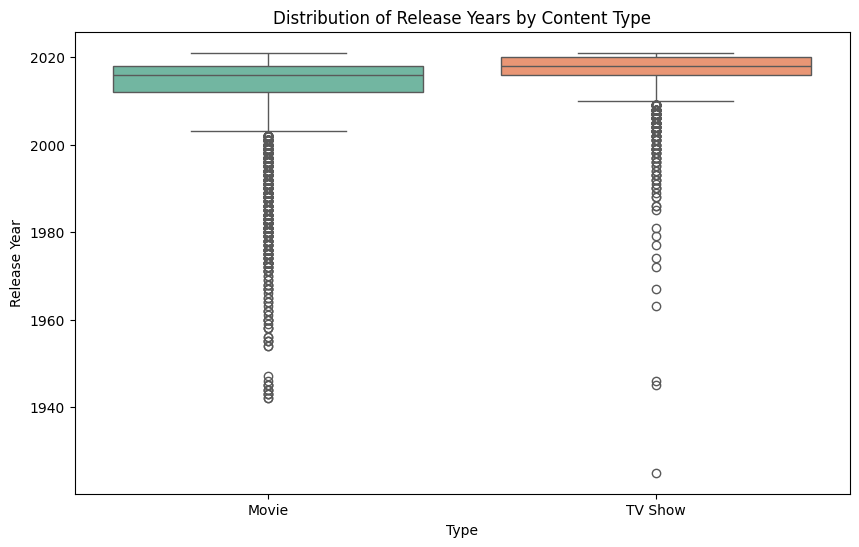

In [55]:
# Boxplot for type vs. release_year
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='release_year', data=netflix_data, palette='Set2')
plt.title('Distribution of Release Years by Content Type')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()

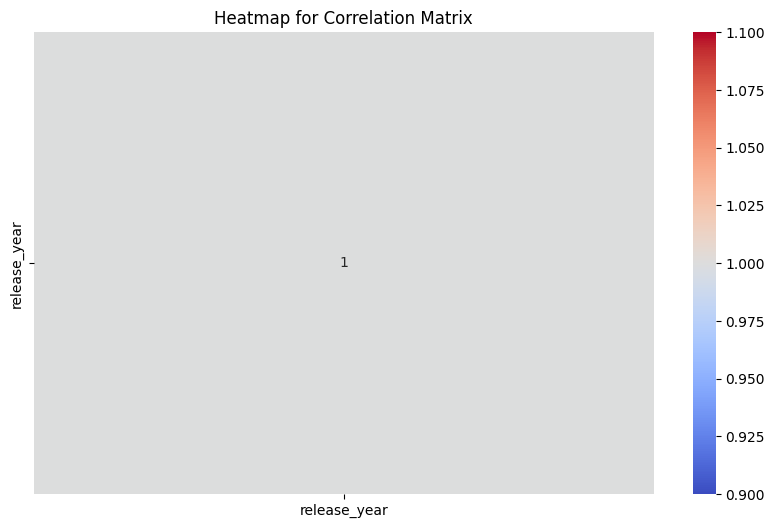

In [56]:
numeric_data = netflix_data[['release_year']]  # Filtering only the numeric column

# Heatmap for correlation matrix
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap for Correlation Matrix')
plt.show()

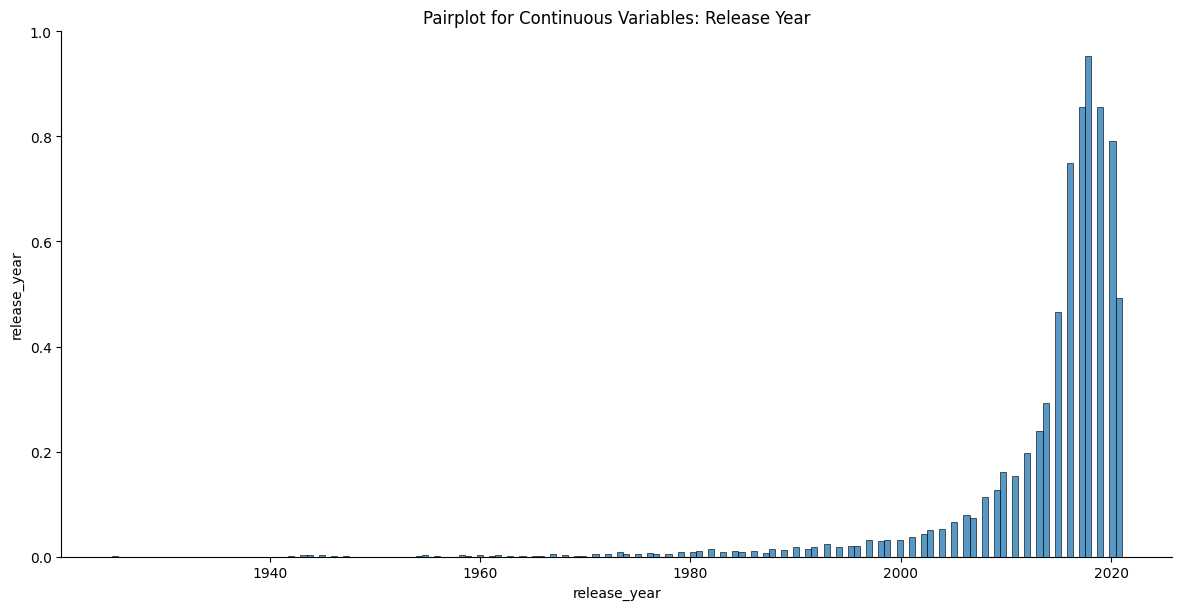

In [57]:
# Pairplot (only release_year is a continuous variable in the cleaned dataset)
sns.pairplot(netflix_data[['release_year']], kind='scatter', height=6, aspect=2)
plt.title('Pairplot for Continuous Variables: Release Year')
plt.show()

In [58]:
# Filter the dataset for TV Shows
tv_shows_data = netflix_data[netflix_data['type'] == 'TV Show']

# Check the unique values of the 'date_added' column to find any inconsistencies
unique_dates = tv_shows_data['date_added'].dropna().unique()

# Show some of the unique date formats to understand the issue
unique_dates[:10]
# Removing leading and trailing whitespaces from the 'date_added' column
tv_shows_data['date_added'] = tv_shows_data['date_added'].str.strip()

# Attempt to convert 'date_added' to datetime format again
try:
    tv_shows_data['date_added'] = pd.to_datetime(tv_shows_data['date_added'])
    tv_shows_data['month_added'] = tv_shows_data['date_added'].dt.month
    print("Successfully converted 'date_added' to datetime format.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully converted 'date_added' to datetime format.


/var/folders/rs/m2tykgts4c58vy1x3bg5v2640000gn/T/ipykernel_8815/3208803731.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_data['date_added'] = tv_shows_data['date_added'].str.strip()
/var/folders/rs/m2tykgts4c58vy1x3bg5v2640000gn/T/ipykernel_8815/3208803731.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_data['date_added'] = pd.to_datetime(tv_shows_data['date_added'])
/var/folders/rs/m2tykgts4c58vy1x3bg5v2640000gn/T/ipykernel_8815/3208803731.py:15: SettingWithCopyWarning: 
A val

/var/folders/rs/m2tykgts4c58vy1x3bg5v2640000gn/T/ipykernel_8815/333601.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_additions.index, y=monthly_additions.values, palette='coolwarm')


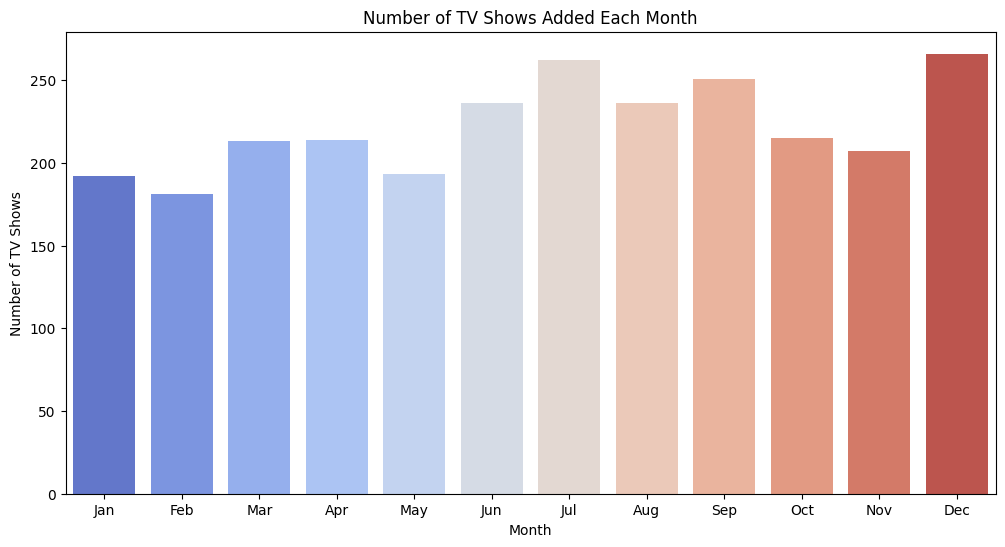

In [59]:
# Counting the number of TV Shows added each month
monthly_additions = tv_shows_data['month_added'].value_counts().sort_index()

# Visualizing the data
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_additions.index, y=monthly_additions.values, palette='coolwarm')
plt.title('Number of TV Shows Added Each Month')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

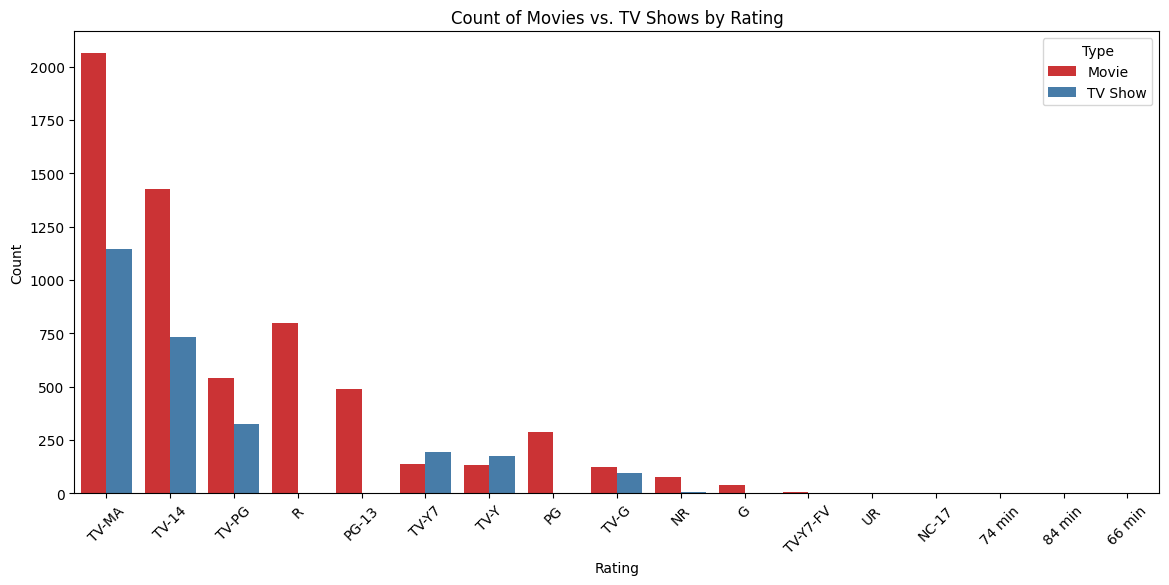

In [60]:
# Countplot for Type vs Rating
plt.figure(figsize=(14, 6))
sns.countplot(x='rating', hue='type', data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='Set1')
plt.title('Count of Movies vs. TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

/var/folders/rs/m2tykgts4c58vy1x3bg5v2640000gn/T/ipykernel_8815/2004400767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='release_year', data=netflix_data, palette='Set1')


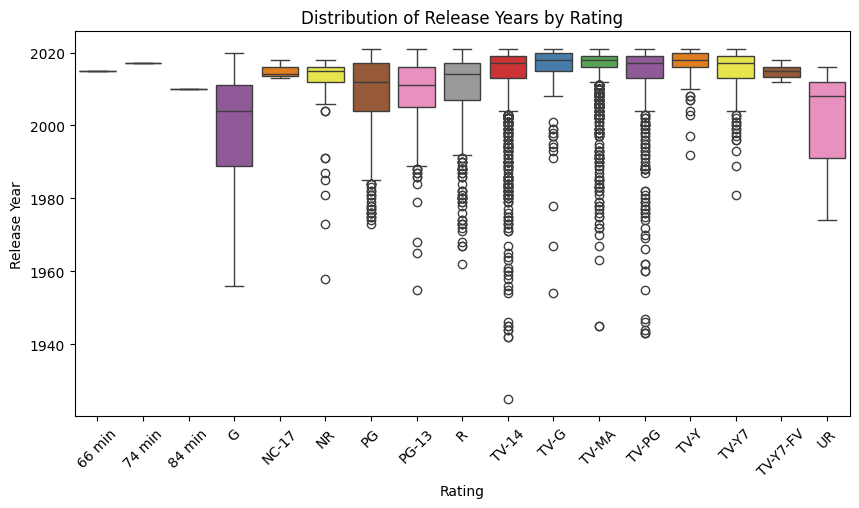

In [61]:
# Boxplot for rating vs. release_year
plt.figure(figsize=(10, 5))
sns.boxplot(x='rating', y='release_year', data=netflix_data, palette='Set1')
plt.title('Distribution of Release Years by Rating')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.xticks(rotation=45)
plt.show()

/var/folders/rs/m2tykgts4c58vy1x3bg5v2640000gn/T/ipykernel_8815/166431410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='release_year', data=netflix_data, palette='Set2')


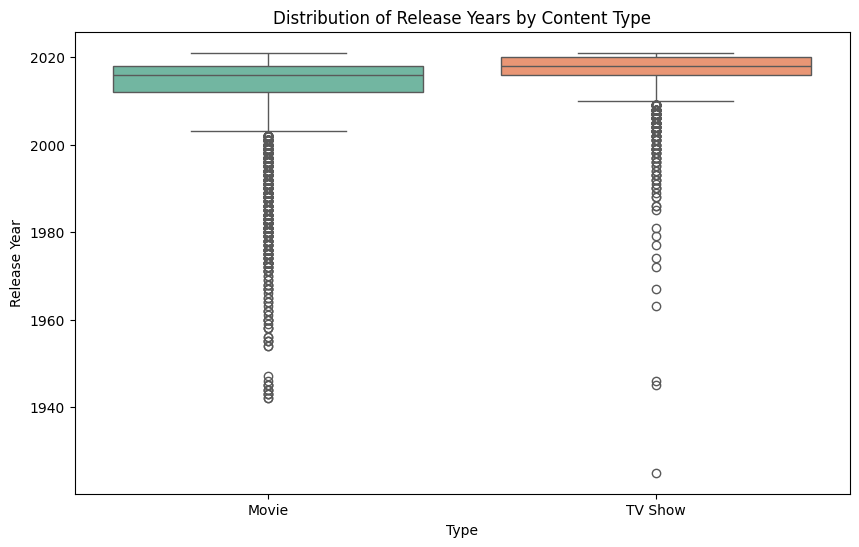

In [62]:
# Boxplot for type vs. release_year
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='release_year', data=netflix_data, palette='Set2')
plt.title('Distribution of Release Years by Content Type')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()


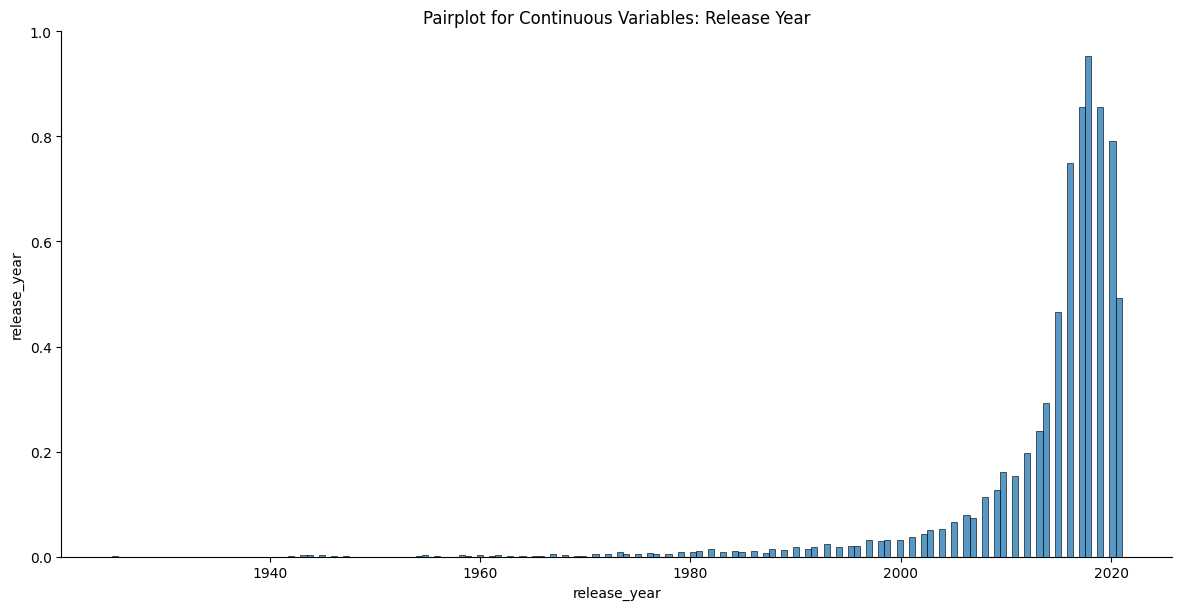

In [63]:
# Pairplot (only release_year is a continuous variable in the cleaned dataset)
sns.pairplot(netflix_data[['release_year']], kind='scatter', height=6, aspect=2)
plt.title('Pairplot for Continuous Variables: Release Year')
plt.show()

/var/folders/rs/m2tykgts4c58vy1x3bg5v2640000gn/T/ipykernel_8815/1673992390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_data['date_added'] = pd.to_datetime(tv_shows_data['date_added'].str.strip())
/var/folders/rs/m2tykgts4c58vy1x3bg5v2640000gn/T/ipykernel_8815/1673992390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_data['month_added'] = tv_shows_data['date_added'].dt.month
/var/folders/rs/m2tykgts4c58vy1x3bg5v2640000gn/T/ipykernel_8815/1673992390.py:13: FutureWarning: 

Passi

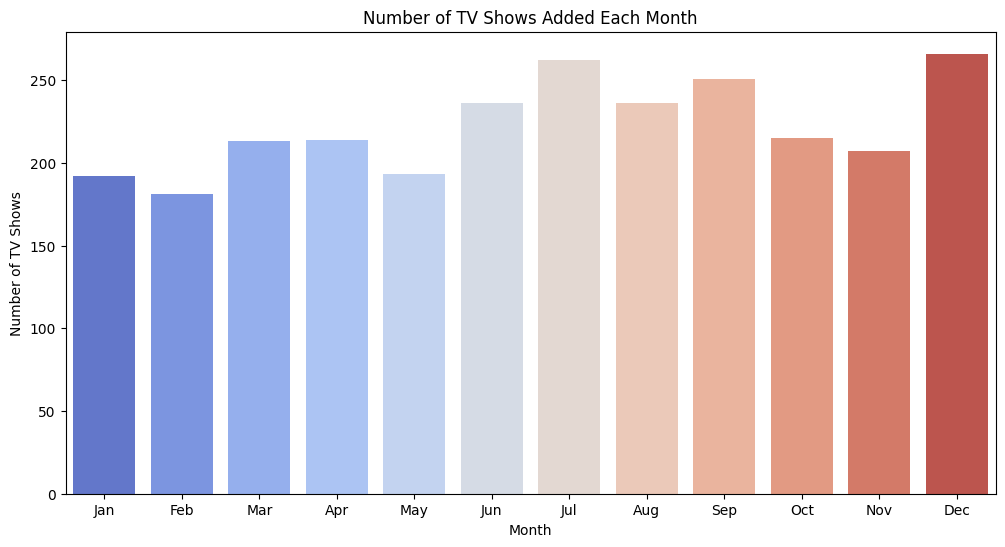

In [64]:
# Filtering the dataset for TV Shows
tv_shows_data = netflix_data[netflix_data['type'] == 'TV Show']

# Extracting the month from the 'date_added' column
tv_shows_data['date_added'] = pd.to_datetime(tv_shows_data['date_added'].str.strip())
tv_shows_data['month_added'] = tv_shows_data['date_added'].dt.month

# Counting the number of TV Shows added each month
monthly_additions = tv_shows_data['month_added'].value_counts().sort_index()

# Visualizing the data
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_additions.index, y=monthly_additions.values, palette='coolwarm')
plt.title('Number of TV Shows Added Each Month')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()